In [ ]:
!pip install pydub
!pip install ffmpeg

from google.colab import drive
drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=6db4e35ad477bdffc530e24a29cc3d14dccc8eb04ac0b46826bd90b68cf42487
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
from pydub import AudioSegment
import librosa
import IPython.display as ipd
import tensorflow as tf
import pandas as pd
import os
import math
import wave
import pylab
import sys
sys.path.insert(0, '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/dataset1/')
import IPython.display as ipd

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras import layers, models, activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split

import librosa
from pathlib import Path

In [ ]:
audioCSV = pd.read_csv('/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/AudioTrainingSheet.csv')

In [ ]:
audioCSV['category'].unique()

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets',
       'static'], dtype=object)

In [ ]:
audioCSV.shape

(3236, 7)

In [ ]:
#All training data directories
DIRECTORIES = ['/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/dataset1/audio/audio/44100/',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/cadillac',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/pinehill',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/bernard',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/gilmore',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/northeast']

#Acadia only training data directories
ACAD_DIRECTORIES = ['/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/cadillac',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/pinehill',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/bernard',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/gilmore',
                '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/northeast']

#location of spectrograms
OUTPUT_DIR = '/content/drive/MyDrive/Datasets/Spectrograms/'

#folder name for all training images
SPEC_DIR = 'nat-unat-audio-images'

#Folder name for acadia only images
ACAD_DIR = 'acadia-only-audio-images'

In [ ]:

#where to define each category as natural or unnatural
natural_sounds = [23, 5, 14, 3, 13, 9, 0, 30, 29, 25,  4,
                  6, 7, 2, 17, 10, 1, 11, 8, 21, 19,
                  15, 16, 51]
unnatural_sounds= [47, 27, 34, 43, 41, 46, 22, 37,
                   38, 24, 12, 20, 33, 44, 48, 39,
                   49, 40, 32, 26, 31, 42, 28, 18, 45,
                   36, 35]

#helper for determineing if a category is a natural or unnatural
def Natural_Definer(target):
  if target in natural_sounds:
    return 0
  elif target in unnatural_sounds:
    return 1
  else:
    return 2

#helper for gettign audio samples and sample rate from wav file path
def get_wav_info(wav_file):
  """
  wav = wave.open(wav_file, 'r')
  frames = wav.readframes(-1)
  sound_info = pylab.frombuffer(frames, 'int16')
  frame_rate = wav.getframerate()
  wav.close()
  """
  sound_info, frame_rate = librosa.load(wav_file)

  return sound_info, frame_rate

In [ ]:
# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 2


In [ ]:


# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, ACAD_DIR),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, ACAD_DIR),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 1234 files belonging to 2 classes.
Using 988 files for training.
Found 1234 files belonging to 2 classes.
Using 246 files for validation.


In [ ]:
#model architecture, wouldn't touch
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                        

In [ ]:
# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)


In [ ]:
#Load desired model from file path
model.load_weights('/content/drive/MyDrive/Datasets/IQPModels/BinaryModelAcc92.h5')

In [ ]:

#helper functions for testing model
def NumericalPrediction(tensorPrediction):
  return np.argmax(tensorPrediction[0])

def LabelLookUp(label):
  row = audioCSV.loc[audioCSV['target'] == label]
  return row['category'].unique()[0]

def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])

def path_to_img(path):
  img = tf.io.read_file(path)
  img = decode_img(img)
  return img

1/1 [==============================] - 0s 497ms/step


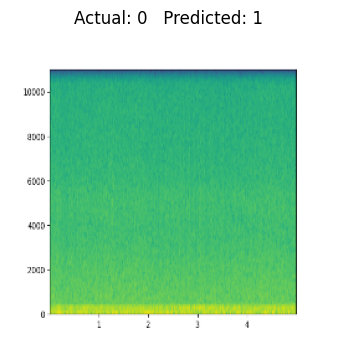

In [ ]:
#DEMO FROM VALID SET

sample = valid_dataset.unbatch().take(1)

plt.figure(figsize=(14, 14))

for image, label in sample:
  ax = plt.subplot(3, 3, 3)
  plt.imshow(image.numpy().astype("uint8"))

  #takes image and runs it through a prediction
  x = np.expand_dims(image, axis=0)
  y_predict = model.predict(x)

  plt.title("Actual: "+ str(label.numpy().astype("uint8")) + "   Predicted: " + str(NumericalPrediction(y_predict)))
  plt.axis("off")
plt.show()

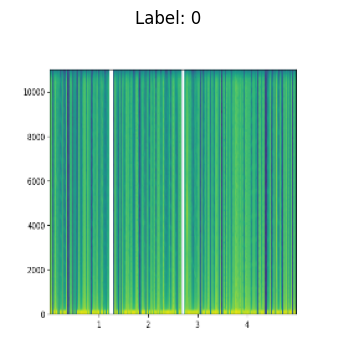

In [ ]:
#DEMO with specific file from path
filepath = '/content/drive/MyDrive/Datasets/SoundRecog/Natural_Sound_Dataset/AudioTrainingDataSet/audiofiles/pinehill/'
filename = '7-0703225500-C-51'

specTestDir = '/content/drive/MyDrive/Datasets/Spectrograms/testing-audio-images/'

samples, sample_rate = get_wav_info(filepath + filename + '.wav')

ipd.display(ipd.Audio(samples, rate=sample_rate))

if not os.path.exists(specTestDir + filename + '.png'):
  pylab.specgram(samples, Fs=sample_rate)
  pylab.savefig(specTestDir + filename + '.png')
  pylab.close()


imagepng = specTestDir + filename + '.png'
img = path_to_img(imagepng)
plt.figure(figsize=(14, 14))
ax = plt.subplot(3, 3, 3)
plt.imshow(img.numpy().astype("uint8"))
#takes image and runs it through a prediction
x = np.expand_dims(img, axis=0)
#y_predict = model.predict(x)
plt.title("Label: " + str(Natural_Definer(int(filename.split('-')[3]))))
plt.axis("off")
plt.show()

In [ ]:
#Show model prediction
x = np.expand_dims(img, axis=0)
y_predict = model.predict(x)
print(y_predict[0])

print('Guess: ' + str(NumericalPrediction(y_predict)))


1/1 [==============================] - 1s 1s/step
[9.9980634e-01 1.9372010e-04]
Guess: 0


In [ ]:
#Acadia file paths to raw audio that needs to be analyzed by model
RAWAUDIODIRS = ['/content/drive/MyDrive/AcadiaData/RawAudio/cadillac/',
               '/content/drive/MyDrive/AcadiaData/RawAudio/pinehill/',
               '/content/drive/MyDrive/AcadiaData/RawAudio/bernard/',
               '/content/drive/MyDrive/AcadiaData/RawAudio/gilmore/',
               '/content/drive/MyDrive/AcadiaData/RawAudio/northeast/']

#Path to where audio images/spectrograms need to be stored
AUDIOIMAGEDIRS = ['/content/drive/MyDrive/AcadiaData/audio-images/cadillac/',
               '/content/drive/MyDrive/AcadiaData/audio-images/pinehill/',
               '/content/drive/MyDrive/AcadiaData/audio-images/bernard/',
               '/content/drive/MyDrive/AcadiaData/audio-images/gilmore/',
               '/content/drive/MyDrive/AcadiaData/audio-images/northeast/']

#Path to CSV where analysis of Acadia audio is stored
AUDIOCSVDIRS = ['/content/drive/MyDrive/AcadiaData/audio-images/cadillac/CadillacSoundAnalysis.csv',
               '/content/drive/MyDrive/AcadiaData/audio-images/pinehill/PinehillSoundAnalysis.csv',
               '/content/drive/MyDrive/AcadiaData/audio-images/bernard/BernardSoundAnalysis.csv',
               '/content/drive/MyDrive/AcadiaData/audio-images/gilmore/GilmoreSoundAnalysis.csv',
               '/content/drive/MyDrive/AcadiaData/audio-images/northeast/NortheastSoundAnalysis.csv']

In [ ]:
#initialize csv if empty and new
def initializeCSV(AUDIOCSVDIRS):

  csv = pd.read_csv(AUDIOCSVDIRS)
  if len(csv) < 2:
    with open(AUDIOCSVDIRS, 'a') as f:
      f.write('\n')

In [ ]:
#analyzes spectrogram and returns prediction
def AnalyzeSpectrogram(AudioImgDir, clipFileName, day):

  hour = clipFileName.split('-')[1][4:6]

  dayFolder = 'day'+str(day)+'/'
  hourFolder = 'hour'+str(hour)+'/'

  imagepng = AudioImgDir + dayFolder + hourFolder + clipFileName + '.png'
  img = path_to_img(imagepng)
  x = np.expand_dims(img, axis=0)

  y_predict = model.predict(x, verbose=0)
  #print(y_predict[0])
  return y_predict[0]



In [ ]:
# C-07050135-1
# Location-MMDDhhmm-Take

#converts audio file into spectrogram
def ConvertToSpectrogram(AudioImgDir, clippedFileName, samples, sample_rate, day):

  hour = clippedFileName.split('-')[1][4:6]

  dayFolder = 'day'+str(day)+'/'
  hourFolder = 'hour'+str(hour)+'/'

  if not os.path.exists(os.path.join(AudioImgDir)):
      os.mkdir(os.path.join(AudioImgDir))

  if not os.path.exists(os.path.join(AudioImgDir, dayFolder)):
      os.mkdir(os.path.join(AudioImgDir, dayFolder))

  if not os.path.exists(os.path.join(AudioImgDir, dayFolder, hourFolder)):
      os.mkdir(os.path.join(AudioImgDir, dayFolder, hourFolder))

  if not os.path.exists(AudioImgDir + dayFolder + hourFolder + clippedFileName + '.png'):
    pylab.specgram(samples, Fs=sample_rate)
    pylab.savefig(AudioImgDir + dayFolder + hourFolder + clippedFileName + '.png')
    pylab.close()

#raw filename = C-07050135.wav

#analyzes a single audio file representing an hour however hour current sample method only analyzes 3 min clips for each hour
def AnalyzeHour(AudioImgDir, analysisCSV, RawAudioDir, RawFileName, day):
  df = pd.DataFrame(columns=['date','day', 'hour', 'start', 'end', 'per_natural', 'per_unnatural'])


  clip_size = 5
  dayFolder = 'day'+str(day)+'/'
  samples, sample_rate = get_wav_info(RawAudioDir + dayFolder + RawFileName + '.wav')
  sample_chunks = clip_size * sample_rate

  total_unnatural = 0
  total_natural = 0
  take = 0

  for i in range(math.floor(samples.size / sample_chunks)):
    frame_a = i  * sample_chunks
    frame_b = (i+1) * sample_chunks
    take = i
    clippedFileName = RawFileName + '-' + str(take)
    #print(take)
    clip = samples[frame_a:frame_b]

    #convert to spectrogram
    ConvertToSpectrogram(AudioImgDir, clippedFileName, clip, sample_rate, day)

    #analyze spectogram
    prediction = AnalyzeSpectrogram(AudioImgDir, clippedFileName, day)

    #add up natural and unnatural
    #print(prediction)
    total_natural += prediction[0]
    total_unnatural += prediction[1]

  percent_natural = total_natural / (take + 1)
  percent_unnatural = total_unnatural / (take + 1)

  #print('  Percent natural: ' + str(percent_natural))
  #print('  Percent unnatural: ' + str(percent_unnatural))

  date = RawFileName.split('-')[1][0:2] + '/' + RawFileName.split('-')[1][2:4]
  hour = RawFileName.split('-')[1][4:6]
  start = RawFileName.split('-')[1][6:8]
  end = str(int(RawFileName.split('-')[1][6:8]) + 3)

  df.loc[take] = [date, day, hour, start, end, percent_natural, percent_unnatural]
  df.to_csv(analysisCSV, mode='a',header=False, index=False)



#method analyzes a whole day
def AnalyzeDay(AudioImgDir, analysisCSV, RawAudioDir, day):

  dayFolder = 'day'+str(day) + '/'
  RawFileDirPath = RawAudioDir + dayFolder

  if not os.path.exists(os.path.join(RawAudioDir, dayFolder)):
      os.mkdir(os.path.join(RawAudioDir, dayFolder))

  for filename in os.listdir(RawFileDirPath):
    fileNameShort = filename.split('.')[0]
    #print(filename)
    #print(' Starting hour ' + str(fileNameShort.split('-')[1][4:6]))
    AnalyzeHour(AudioImgDir, analysisCSV, RawAudioDir, fileNameShort, day)




In [ ]:
#analyze hour
#AnalyzeHour(AUDIOIMAGEDIRS[0], AUDIOCSVDIRS[0], RAWAUDIODIRS[0], 'C-06212050', 1)

Percent natural: 0.9956859565443463
Percent unnatural: 0.004314044835410474


In [ ]:
#Analyzes the day of a location
#AnalyzeDay(AUDIOIMAGEDIRS[0], AUDIOCSVDIRS[0], RAWAUDIODIRS[0], 1)

C-06211909.wav
Starting hour 19
Percent natural: 0.9972884986135695
Percent unnatural: 0.0027114950183887124
C-06212050.wav
Starting hour 20
Percent natural: 0.9956859565443463
Percent unnatural: 0.004314044835410474


In [ ]:
#Analyze an entire locations data
def AnalyzeLocation(AudioImgDir, analysisCSV, RawAudioDir):

  #Amount of days being analyzed
  daysToAnalyze = 8

  for i in range(daysToAnalyze):
    print('Analyzing Day ' + str(i+1))
    AnalyzeDay(AudioImgDir, analysisCSV, RawAudioDir, i+1)

In [ ]:
# 0 - > Cadillac
# 1 - > Pinehill
# ...
# 4 - > Northeast

AnalyzeLocation(AUDIOIMAGEDIRS[0], AUDIOCSVDIRS[0], RAWAUDIODIRS[0])

Analyzing Day 1
Analyzing Day 2
Analyzing Day 3
Analyzing Day 4
Analyzing Day 5
Analyzing Day 6
Analyzing Day 7
Analyzing Day 8


In [ ]:
#Analyzes all acadia files
def AnalayzeAcadia(AudioImgDir, analysisCSV, RawAudioDir):
  for i in range(len(RawAudioDir)):
    print('Analyzing ' + RawAudioDir[i].split('/')[6])
    print('-----------------------------------')
    AnalyzeLocation(AUDIOIMAGEDIRS[i], AUDIOCSVDIRS[i], RAWAUDIODIRS[i])
    print('-----------------------------------')
    print(' ')

In [ ]:
#initializeCSV(AUDIOCSVDIRS)

In [ ]:
#AnalayzeAcadia(AUDIOIMAGEDIRS, AUDIOCSVDIRS, RAWAUDIODIRS)

In [ ]:
#set location analysis to cadillac, change the index to desired location
LocationCSV = pd.read_csv(AUDIOCSVDIRS[0])

In [ ]:
LocationCSV.head

In [ ]:
LocationCSV['day']

In [ ]:
LocationCSV['perc_natural'].loc[LocationCSV['day'] == 1]

In [ ]:
#Average of composition of each day
compositionByDay = LocationCSV['perc_natural'].loc[LocationCSV['day'] == i + 1]
#print(compositionByDay)

y = []
z = []

for i in range(8):
  compositionByDay = LocationCSV['perc_natural'].loc[LocationCSV['day'] == i + 1]
  y.append(0)
  z.append(0)
  #print(len(compositionByDay))
  for hour in compositionByDay:
    if i+1 == 1:
      print(hour)
    y[i] += hour

  y[i] = (y[i] / len(compositionByDay)) * 100
  z[i] = 100 - y[i]


0.9972884638441932
0.9956859532329772
0.9260678433476844
0.8922237570707997
0.9999793801042768


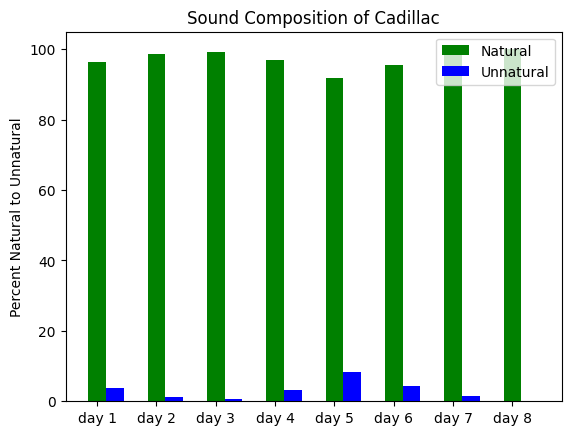

In [ ]:

#Graph of average sound composition by day
fig = plt.figure(figsize=(10,6), facecolor=(0.8823529411764706, 0.8784313725490196, 0.8509803921568627))
Xlabel = ['day 1', 'day 2', 'day 3', 'day 4', 'day 5', 'day 6', 'day 7', 'day 8']
x = np.arange(len(Xlabel))

plt.bar(x + 0.0, y, color = (1.0, 0.47, 0.42), width = 0.3, label = 'Natural')
plt.bar(x + 0.3, z, color = (0.3, 0.57, 0.82), width = 0.3, label = 'Unnatural')

plt.xticks(x, Xlabel)
plt.ylabel('Percent Natural to Unnatural')
plt.title('Sound Composition of Cadillac')
plt.legend()
ax = plt.gca()
#ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0.8823529411764706, 0.8784313725490196, 0.8509803921568627))

plt.show()

In [ ]:
LocationCSV[['hour', 'perc_natural']].loc[LocationCSV['day'] == 1]

,hour,perc_natural
0,19,0.997288
1,20,0.995686
2,21,0.926068
3,22,0.892224
4,23,0.999979


In [ ]:
LocationCSV['hour'].loc[1]

20

In [ ]:
compositionByHour = LocationCSV['perc_natural'].loc[LocationCSV['hour'] == i + 1]
print(compositionByHour)

13     0.999604
37     0.996859
71     0.999995
85     0.954154
109    0.972711
130    0.992988
157    0.999898
Name: perc_natural, dtype: float64


In [ ]:


y = []
z = []

for i in range(24):
  compositionByHour = LocationCSV['perc_natural'].loc[LocationCSV['hour'] == i]
  y.append(0)
  z.append(0)
  #print(len(compositionByHour))
  for day in compositionByHour:
    y[i] += day

  y[i] = (y[i] / len(compositionByHour)) * 100
  z[i] = 100 - y[i]

In [ ]:
#for i in range(24):
# print(y[i] + z[i])

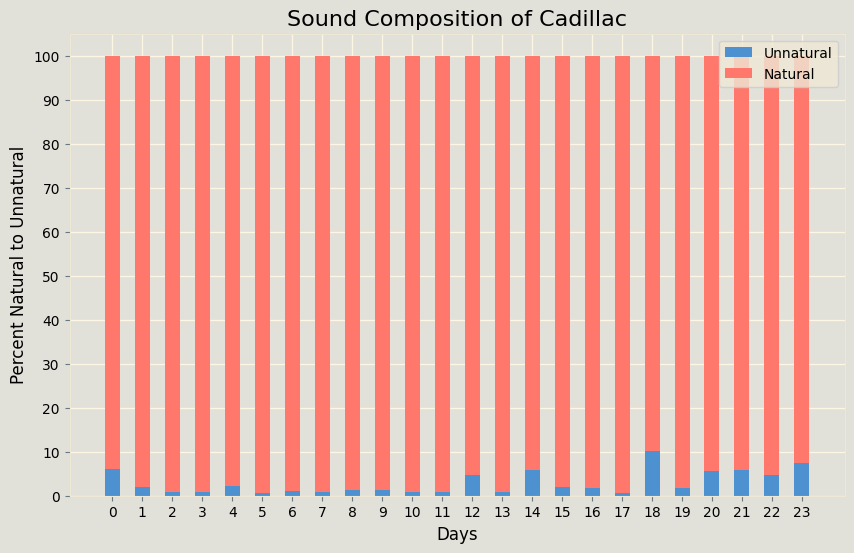

In [ ]:

#Graph of average sound composition by Hour
fig = plt.figure(figsize=(10,6), facecolor=(0.8823529411764706, 0.8784313725490196, 0.8509803921568627))
x = np.arange(24)
yPer = np.arange(start = 0, stop = 110, step = 10)

plt.bar(x, z, color = (0.3, 0.57, 0.82), width = 0.5, label = 'Unnatural')
plt.bar(x, y, color = (1.0, 0.47, 0.42), width = 0.5, bottom=z, label = 'Natural')

plt.xticks(x, color='black')
plt.yticks(yPer, color='black')
plt.ylabel('Percent Natural to Unnatural', color='black')
plt.xlabel('Days', color='black')
plt.title('Sound Composition of Cadillac')
plt.legend()


ax = plt.gca()
#ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0.8823529411764706, 0.8784313725490196, 0.8509803921568627))

plt.show()